# Partitioning Benchmark

In [7]:
import networkx as nx
import cProfile
import random
import timeit
import matplotlib.pyplot as plt

from original_partitioner import part_graph_extended as original_part
from adjlist_partitioner import part_graph_extended as adjlist_part

In [2]:
def networkx_to_metis_adjlist(G):    
    n = G.number_of_nodes()
    adjlist = [[] for _ in range(n)]
    
    for u, v, data in G.edges(data=True):
        weight = data['weight']
        adjlist[u].append((v, weight))

    return adjlist

def create_random_graph(n, p):
    G = nx.erdos_renyi_graph(n=n, p=p)
    
    for u, v in G.edges():
        G[u][v]['weight'] = random.randint(0, 10)
        
    return G

def benchmark_orig_one_trial(n, p, parts, dist):
    G = create_random_graph(n, p)
    
    start = timeit.default_timer()
    original_part(G, parts, dist)
    stop = timeit.default_timer()
    
    return stop - start

def benchmark_adjlist_one_trial(n, p, parts, dist):
    G = create_random_graph(n, p)
    adjlist = networkx_to_metis_adjlist(G)
    
    start = timeit.default_timer()
    adjlist_part(adjlist, parts, dist)
    stop = timeit.default_timer()
    
    return stop - start

Profiling

In [14]:
def profile_run():
    benchmark_adjlist_one_trial(10000, 0.3, 5, 4)

cProfile.run('profile_run()', 'adj_part.prof')

In [6]:
sizes = []
orig_time = []
adjlist_time = []

size = 64

while True:
    time1 = benchmark_orig_one_trial(size, 0.3, 5, 4)
    time2 = benchmark_adjlist_one_trial(size, 0.3, 5, 4)
    
    sizes.append(size)
    orig_time.append(time1)
    adjlist_time.append(time2)
    
    print(size, time1, time2)
    
    if time1 > 60:
        break
    
    size *= 2
    
print(sizes, orig_time, adjlist_time)

64 0.005702706000022317 0.004892014000006384
128 0.012091301000054955 0.010198239999965608
256 0.031171056999994562 0.016996710000000803
512 0.12627640699997755 0.022056795000025886
1024 0.37151344500000505 0.059682201999976314
2048 1.5551010510000083 0.23016544500001146
4096 6.765661819000002 0.8897028060000025
8192 29.471608714000013 3.6205519480000135
16384 138.46122182800002 16.846575508
[64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384] [0.005702706000022317, 0.012091301000054955, 0.031171056999994562, 0.12627640699997755, 0.37151344500000505, 1.5551010510000083, 6.765661819000002, 29.471608714000013, 138.46122182800002] [0.004892014000006384, 0.010198239999965608, 0.016996710000000803, 0.022056795000025886, 0.059682201999976314, 0.23016544500001146, 0.8897028060000025, 3.6205519480000135, 16.846575508]


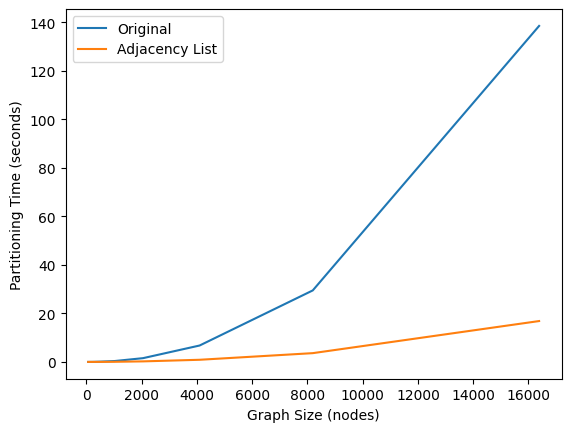

In [12]:
plt.xlabel('Graph Size (nodes)')
plt.ylabel('Partitioning Time (seconds)')

plt.plot(sizes, orig_time, label="Original")
plt.plot(sizes, adjlist_time, label="Adjacency List")

plt.legend()
plt.show()

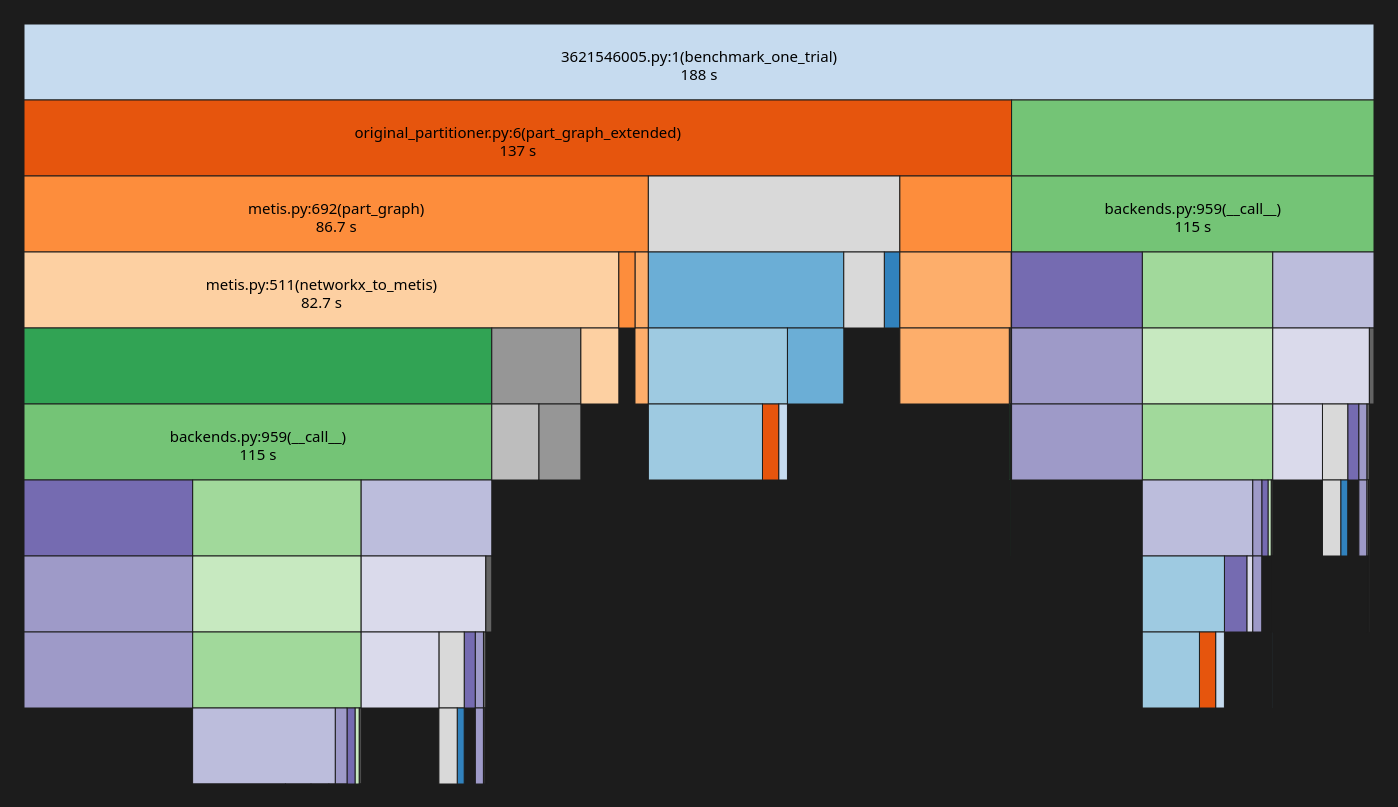